In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
import ast
import missingno as msn

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['figure.dpi']=120
plt.rcParams['font.size']=14

In [ ]:
df = pd.read_csv('movies-cleaned-data.csv')


df.head()

,Unnamed: 0,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,vote_average,vote_count,collection_Id,genre1,genre2,genre3,genre4,homePagePresent,score,Producer1,Producer2,TotalLanguages
0,0,0,30000000,862,tt0114709,en,toy story,"led by woody, andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,Released,7.7,5415,10194,Animation,Comedy,Family,NaN,True,41695.5,pixar animation studios,NaN,1
1,1,0,65000000,8844,tt0113497,en,jumanji,when siblings judy and peter discover an encha...,17.015539,1995-12-15,262797249,104.0,Released,6.9,2413,-1,Adventure,Fantasy,Family,NaN,False,16649.7,tristar pictures,teitler film,2
2,2,0,0,15602,tt0113228,en,grumpier old men,a family wedding reignites the ancient feud be...,11.712900,1995-12-22,0,101.0,Released,6.5,92,119050,Romance,Comedy,NaN,NaN,False,598.0,warner bros.,lancaster gate,1
3,3,0,16000000,31357,tt0114885,en,waiting to exhale,"cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127.0,Released,6.1,34,-1,Comedy,Drama,Romance,NaN,False,207.4,twentieth century fox film corporation,NaN,1
4,4,0,0,11862,tt0113041,en,father of the bride part ii,just when george banks has recovered from his ...,8.387519,1995-02-10,76578911,106.0,Released,5.7,173,96871,Comedy,NaN,NaN,NaN,False,986.1,sandollar productions,touchstone pictures,1


In [ ]:
df.shape

(45283, 25)

In [ ]:
df.columns

Index(['Unnamed: 0', 'adult', 'budget', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'status', 'vote_average', 'vote_count', 'collection_Id',
       'genre1', 'genre2', 'genre3', 'genre4', 'homePagePresent', 'score',
       'Producer1', 'Producer2', 'TotalLanguages'],
      dtype='object')

In [ ]:
# Drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'id', 'imdb_id', 'overview', 'collection_Id', 'release_date'], inplace=True)

df.head(10)

,adult,budget,original_language,original_title,popularity,revenue,runtime,status,vote_average,vote_count,genre1,genre2,genre3,genre4,homePagePresent,score,Producer1,Producer2,TotalLanguages
0,0,30000000,en,toy story,21.946943,373554033,81.0,Released,7.7,5415,Animation,Comedy,Family,NaN,True,41695.5,pixar animation studios,NaN,1
1,0,65000000,en,jumanji,17.015539,262797249,104.0,Released,6.9,2413,Adventure,Fantasy,Family,NaN,False,16649.7,tristar pictures,teitler film,2
2,0,0,en,grumpier old men,11.712900,0,101.0,Released,6.5,92,Romance,Comedy,NaN,NaN,False,598.0,warner bros.,lancaster gate,1
3,0,16000000,en,waiting to exhale,3.859495,81452156,127.0,Released,6.1,34,Comedy,Drama,Romance,NaN,False,207.4,twentieth century fox film corporation,NaN,1
4,0,0,en,father of the bride part ii,8.387519,76578911,106.0,Released,5.7,173,Comedy,NaN,NaN,NaN,False,986.1,sandollar productions,touchstone pictures,1
5,0,60000000,en,heat,17.924927,187436818,170.0,Released,7.7,1886,Action,Crime,Drama,Thriller,False,14522.2,regency enterprises,forward pass,2
6,0,58000000,en,sabrina,6.677277,0,127.0,Released,6.2,141,Comedy,Romance,NaN,NaN,False,874.2,paramount pictures,scott rudin productions,2
7,0,0,en,tom and huck,2.561161,0,97.0,Released,5.4,45,Action,Adventure,Drama,Family,False,243.0,walt disney pictures,NaN,2
8,0,35000000,en,sudden death,5.231580,64350171,106.0,Released,5.5,174,Action,Adventure,Thriller,NaN,False,957.0,universal pictures,imperial entertainment,1
9,0,58000000,en,goldeneye,14.686036,352194034,130.0,Released,6.6,1194,Adventure,Action,Thriller,NaN,True,7880.4,united artists,eon productions,3


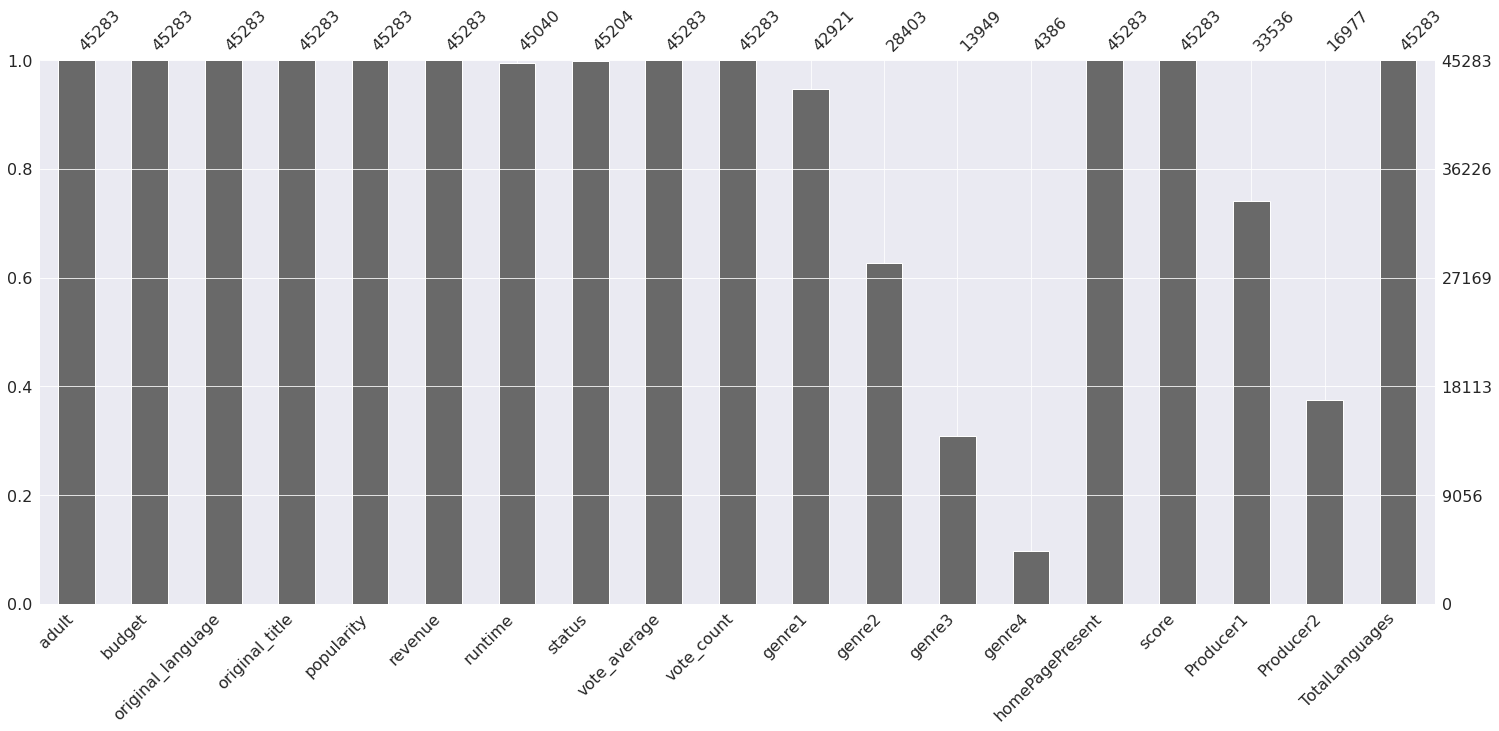

In [ ]:
# Missing values in the dataset
msn.bar(df);

### 1. Profit

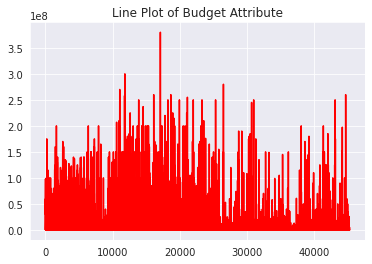

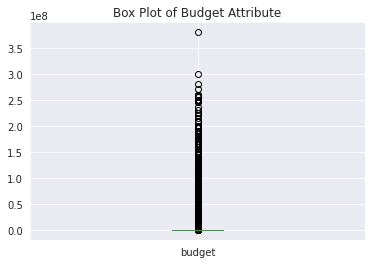

In [ ]:
# Budget
# line plot
df.budget.plot(kind='line', color='r')
plt.title('Line Plot of Budget Attribute')
plt.show()

# box plot
df.budget.plot(kind='box')
plt.title('Box Plot of Budget Attribute')
plt.show()

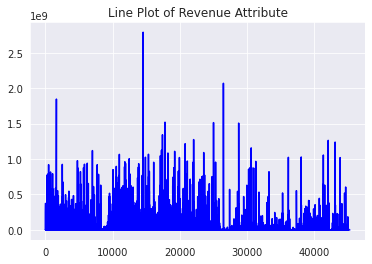

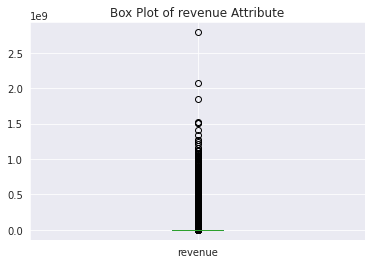

In [ ]:
# Revenue
# line plot
df.revenue.plot(kind='line', color='b')
plt.title('Line Plot of Revenue Attribute')
plt.show()

# box plot
df.revenue.plot(kind='box')
plt.title('Box Plot of revenue Attribute')
plt.show()

In [ ]:
budget_revenue = df.loc[(df.budget !=0) & (df.revenue != 0)]
budget_revenue

,adult,budget,original_language,original_title,popularity,revenue,runtime,status,vote_average,vote_count,genre1,genre2,genre3,genre4,homePagePresent,score,Producer1,Producer2,TotalLanguages
0,0,30000000,en,toy story,21.946943,373554033,81.0,Released,7.7,5415,Animation,Comedy,Family,NaN,True,41695.5,pixar animation studios,NaN,1
1,0,65000000,en,jumanji,17.015539,262797249,104.0,Released,6.9,2413,Adventure,Fantasy,Family,NaN,False,16649.7,tristar pictures,teitler film,2
3,0,16000000,en,waiting to exhale,3.859495,81452156,127.0,Released,6.1,34,Comedy,Drama,Romance,NaN,False,207.4,twentieth century fox film corporation,NaN,1
5,0,60000000,en,heat,17.924927,187436818,170.0,Released,7.7,1886,Action,Crime,Drama,Thriller,False,14522.2,regency enterprises,forward pass,2
8,0,35000000,en,sudden death,5.231580,64350171,106.0,Released,5.5,174,Action,Adventure,Thriller,NaN,False,957.0,universal pictures,imperial entertainment,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45072,0,12000000,ta,சிவாஜி,1.323587,19000000,185.0,Released,6.9,25,Action,Comedy,Drama,NaN,False,172.5,avm productions,NaN,2
45219,0,750000,ru,все и сразу,0.201582,3,0.0,Released,6.0,4,Crime,Comedy,NaN,NaN,False,24.0,кинокомпания «lunapark»,инвада фильм,1
45229,0,800000,en,dikari,0.903061,1328612,100.0,Released,5.8,6,Comedy,Drama,NaN,NaN,False,34.8,NaN,NaN,1
45231,0,2000000,en,про любоff,0.121844,1268793,107.0,Released,4.0,3,Romance,Drama,NaN,NaN,False,12.0,profit,NaN,1


In [ ]:
budget_revenue['profit'] = (budget_revenue.revenue - budget_revenue.budget)/budget_revenue.budget

budget_revenue['profit'] = budget_revenue['profit'].clip(-1,50)

In [ ]:
budget_revenue


,adult,budget,original_language,original_title,popularity,revenue,runtime,status,vote_average,vote_count,genre1,genre2,genre3,genre4,homePagePresent,score,Producer1,Producer2,TotalLanguages,profit
0,0,30000000,en,toy story,21.946943,373554033,81.0,Released,7.7,5415,Animation,Comedy,Family,NaN,True,41695.5,pixar animation studios,NaN,1,11.451801
1,0,65000000,en,jumanji,17.015539,262797249,104.0,Released,6.9,2413,Adventure,Fantasy,Family,NaN,False,16649.7,tristar pictures,teitler film,2,3.043035
3,0,16000000,en,waiting to exhale,3.859495,81452156,127.0,Released,6.1,34,Comedy,Drama,Romance,NaN,False,207.4,twentieth century fox film corporation,NaN,1,4.090760
5,0,60000000,en,heat,17.924927,187436818,170.0,Released,7.7,1886,Action,Crime,Drama,Thriller,False,14522.2,regency enterprises,forward pass,2,2.123947
8,0,35000000,en,sudden death,5.231580,64350171,106.0,Released,5.5,174,Action,Adventure,Thriller,NaN,False,957.0,universal pictures,imperial entertainment,1,0.838576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45072,0,12000000,ta,சிவாஜி,1.323587,19000000,185.0,Released,6.9,25,Action,Comedy,Drama,NaN,False,172.5,avm productions,NaN,2,0.583333
45219,0,750000,ru,все и сразу,0.201582,3,0.0,Released,6.0,4,Crime,Comedy,NaN,NaN,False,24.0,кинокомпания «lunapark»,инвада фильм,1,-0.999996
45229,0,800000,en,dikari,0.903061,1328612,100.0,Released,5.8,6,Comedy,Drama,NaN,NaN,False,34.8,NaN,NaN,1,0.660765
45231,0,2000000,en,про любоff,0.121844,1268793,107.0,Released,4.0,3,Romance,Drama,NaN,NaN,False,12.0,profit,NaN,1,-0.365604


In [ ]:
budget_revenue.shape

(5375, 20)

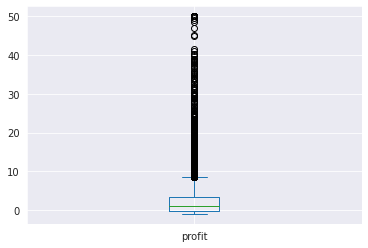

In [ ]:
budget_revenue.profit.plot(kind='box');

In [ ]:
fig = px.histogram(
    budget_revenue,
    x = 'profit',
    title='Histogram of Profit Column'
)
fig.show()

### 2. Do the movies that have high vote_average make lot of profits?

In [ ]:
fig = px.scatter(
    budget_revenue,
    x='vote_average',
    y='profit',
    title='Vote Average vs Profit',
    color = 'vote_average'
)

fig.show()

In [ ]:
fig = px.scatter(
    budget_revenue,
    x='score',
    y='profit',
    title='Score vs Profit',
    color='score'
)
fig.show()

In [ ]:
fig = px.scatter(
    budget_revenue,
    x='popularity',
    y='profit',
    color='popularity'
)

fig.show()

- The above scatter plots shows that the profit moderately increases with vote_average.
- Not every movie with higher vote_average makes better profit.
- Most of movies fall on higher vote average range, however a  few makes better profit.

### Q.3 What genres make the most money?

In [ ]:
budget_revenue.columns

Index(['adult', 'budget', 'original_language', 'original_title', 'popularity',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'genre1',
       'genre2', 'genre3', 'genre4', 'homePagePresent', 'score', 'Producer1',
       'Producer2', 'TotalLanguages', 'profit'],
      dtype='object')

In [ ]:
fig = px.bar(
    budget_revenue,
    x=['genre1', 'genre2','genre3','genre4'],
    y='profit',
    color='profit'
)

fig.show()

- The above bar plot does not make clearer picture.
- The genre columns have null values.
- 

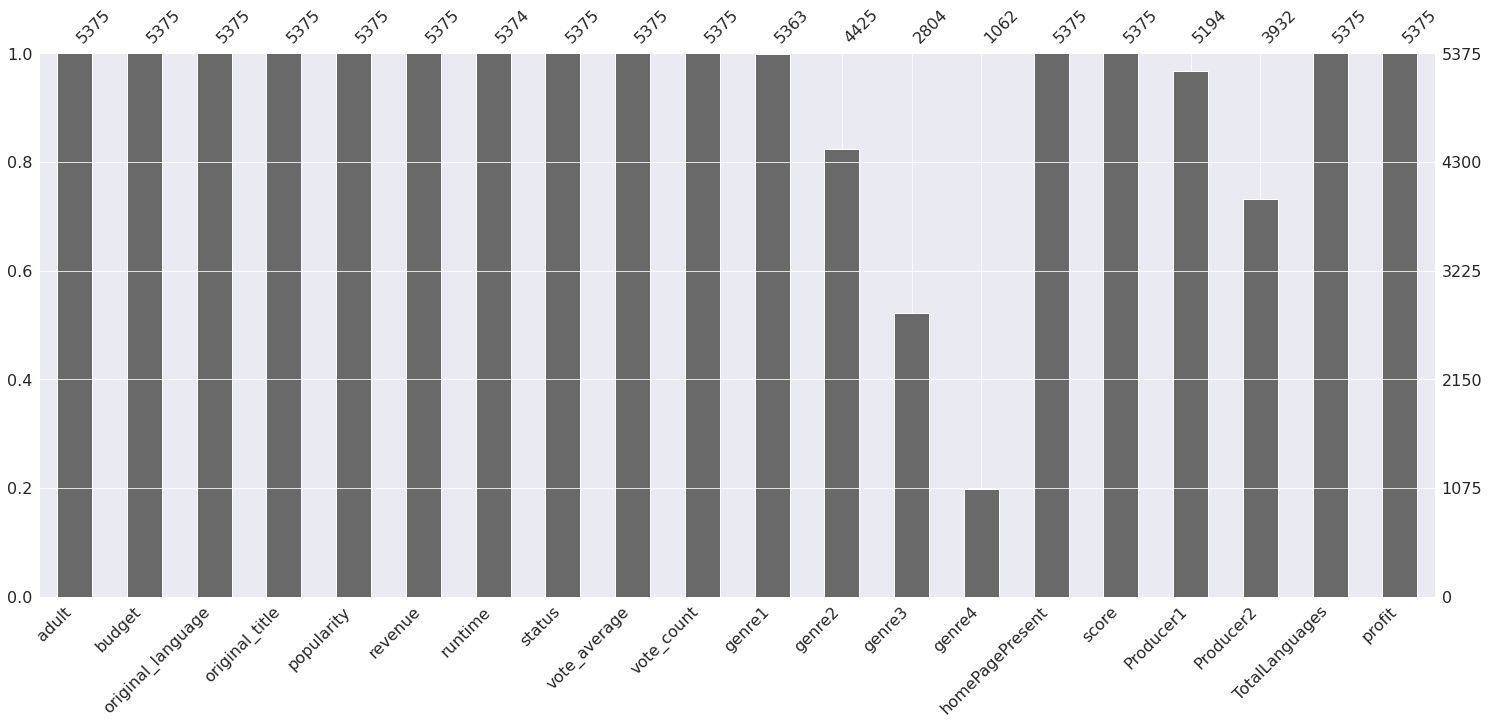

In [ ]:
msn.bar(budget_revenue);

In [ ]:
# Percentage of null value in the genre4 column
(budget_revenue.genre4.isna().sum() / budget_revenue.shape[0])*100

80.24186046511628

In [ ]:
# Percentage of null value in the genre3 column
(budget_revenue.genre3.isna().sum()/budget_revenue.shape[0]) * 100

47.83255813953489

In [ ]:
# Percentage of missing values in genre2 column
budget_revenue.genre2.isna().sum()/budget_revenue.shape[0]*100

17.674418604651162

In [ ]:
budget_revenue.genre1.unique()

array(['Animation', 'Adventure', 'Comedy', 'Action', 'History', 'Drama',
       'Crime', 'Fantasy', 'Science Fiction', 'Horror', 'Romance',
       'Mystery', 'Thriller', 'Documentary', 'Family', 'War', 'Western',
       'Music', nan, 'TV Movie', 'Foreign'], dtype=object)

In [ ]:
budget_revenue.genre1.nunique()

20

In [ ]:
budget_revenue.genre2.unique()

array(['Comedy', 'Fantasy', 'Drama', 'Crime', 'Adventure', 'Action',
       'Romance', 'Thriller', 'Science Fiction', nan, 'Mystery',
       'Animation', 'Family', 'Horror', 'Foreign', 'History', 'Western',
       'War', 'Music', 'Documentary'], dtype=object)

In [ ]:
budget_revenue.genre2.nunique()

19

- Genre3 and Genre4 has high missing values.
- Genre1 has some rows with missing values.

In [ ]:
# drop rows with missing values in genre1
budget_revenue.dropna(subset=['genre1'], inplace=True)

In [ ]:
budget_revenue.shape

(5363, 20)

In [ ]:
# Replace the nan values with space in genre2,3 and 4 columns
budget_revenue.genre2 = budget_revenue.genre2.replace(np.nan, '')

In [ ]:
# Create a genre attribute by combining genre1,and genre2 columns
budget_revenue['Genre'] = budget_revenue.genre1 + '+' + budget_revenue.genre2
budget_revenue.shape

(5363, 21)

In [ ]:
budget_revenue.head()

,adult,budget,original_language,original_title,popularity,revenue,runtime,status,vote_average,vote_count,genre1,genre2,genre3,genre4,homePagePresent,score,Producer1,Producer2,TotalLanguages,profit,Genre
0,0,30000000,en,toy story,21.946943,373554033,81.0,Released,7.7,5415,Animation,Comedy,Family,NaN,True,41695.5,pixar animation studios,NaN,1,11.451801,Animation+Comedy
1,0,65000000,en,jumanji,17.015539,262797249,104.0,Released,6.9,2413,Adventure,Fantasy,Family,NaN,False,16649.7,tristar pictures,teitler film,2,3.043035,Adventure+Fantasy
3,0,16000000,en,waiting to exhale,3.859495,81452156,127.0,Released,6.1,34,Comedy,Drama,Romance,NaN,False,207.4,twentieth century fox film corporation,NaN,1,4.090760,Comedy+Drama
5,0,60000000,en,heat,17.924927,187436818,170.0,Released,7.7,1886,Action,Crime,Drama,Thriller,False,14522.2,regency enterprises,forward pass,2,2.123947,Action+Crime
8,0,35000000,en,sudden death,5.231580,64350171,106.0,Released,5.5,174,Action,Adventure,Thriller,NaN,False,957.0,universal pictures,imperial entertainment,1,0.838576,Action+Adventure


In [ ]:
budget_revenue.Genre.nunique()

214

In [ ]:
fig = px.histogram(
    budget_revenue,
    x='Genre'
)

fig.show()

- 214 Unique Genre of movies.

In [ ]:
fig = px.bar(
    budget_revenue,
    x='Genre',
    y='profit',
    color = 'profit'
)
# fig.update_layout(height=10)

fig.show()

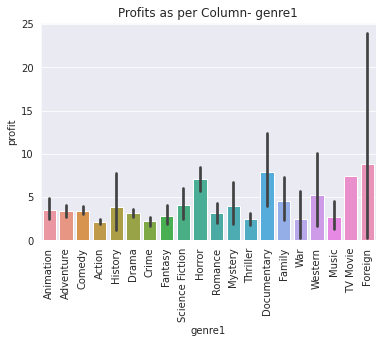

In [ ]:
sns.barplot(x='genre1',y='profit', data=budget_revenue)
plt.title('Profits as per Column- genre1')
plt.xticks(rotation=90)
plt.show()

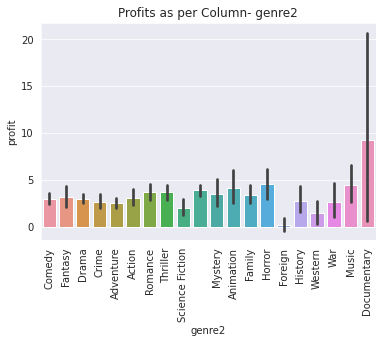

In [ ]:
sns.barplot(x='genre2',y='profit', data=budget_revenue)
plt.title('Profits as per Column- genre2')
plt.xticks(rotation=90)
plt.show()

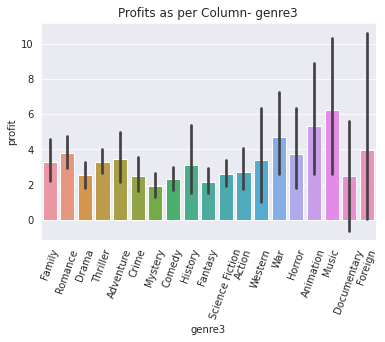

In [ ]:
sns.barplot(x='genre3',y='profit', data=budget_revenue)
plt.title('Profits as per Column- genre3')
plt.xticks(rotation=70)
plt.show()

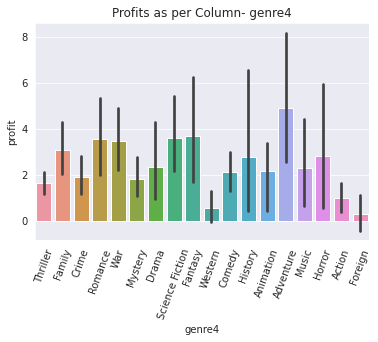

In [ ]:
sns.barplot(x='genre4',y='profit', data=budget_revenue)
plt.title('Profits as per Column- genre4')
plt.xticks(rotation=70)
plt.show()

In [ ]:
budget_revenue.profit.describe()

count    5363.000000
mean        3.325479
std         7.925613
min        -0.999999
25%        -0.212331
50%         1.059136
75%         3.245185
max        50.000000
Name: profit, dtype: float64

In [ ]:
genre = budget_revenue.groupby(['Genre','profit']).Genre.count().to_frame()

genre.rename(columns={'Genre':'count'}, inplace=True)

genre.reset_index(inplace=True)
genre.drop(columns=['count'],inplace=True)

genre.head(10)

,Genre,profit
0,Action+,-0.944166
1,Action+,-0.793723
2,Action+,-0.533057
3,Action+,-0.505172
4,Action+,-0.452771
5,Action+,-0.430126
6,Action+,-0.417609
7,Action+,-0.388706
8,Action+,-0.280120
9,Action+,-0.028252


In [ ]:
high_profit = genre.loc[genre['profit']>10]
high_profit

,Genre,profit
299,Action+Adventure,10.681605
300,Action+Adventure,10.763566
301,Action+Adventure,11.353638
302,Action+Adventure,11.777778
303,Action+Adventure,12.501948
...,...,...
5270,War+Drama,17.484848
5290,Western+,10.368389
5291,Western+,24.000000
5292,Western+,50.000000


In [ ]:
fig = px.bar(
    high_profit,
    x='Genre',
    y='profit',
    color = 'profit',
    title='Genre vs Profit'
)

fig.show()

### Q.4 Which producers generally do well?

In [ ]:
budget_revenue.Producer1.unique()

array(['pixar animation studios', 'tristar pictures',
       'twentieth century fox film corporation', ..., 's pictures',
       'talent house', 'кинокомпания «lunapark»'], dtype=object)

In [ ]:
budget_revenue.Producer1.nunique()

1357

In [ ]:
fig = px.scatter(
    budget_revenue,
    x=['Producer1', 'Producer2'],
    y='profit'
)
fig.show()

### Q.5 Is there a bias with producers in terms of genres that they do- Do specific producer only produce specific genre movies?


In [ ]:
budget_revenue.dropna()
budget_revenue

fig1 = px.scatter(
    budget_revenue,
    x='genre1',
    y='profit',
    
)

fig1.show()

### Q.6 Will a longer run time brings higher profits?

In [ ]:
budget_revenue.columns

Index(['adult', 'budget', 'original_language', 'original_title', 'popularity',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'genre1',
       'genre2', 'genre3', 'genre4', 'homePagePresent', 'score', 'Producer1',
       'Producer2', 'TotalLanguages', 'profit', 'Genre'],
      dtype='object')

In [ ]:
fig = px.scatter(
    budget_revenue,
    x = 'runtime',
    y='profit'
)

fig.show()

### Q.7 Does the presence of homepage indicate higher profits?

In [ ]:
budget_revenue.homePagePresent.value_counts()

False    3451
True     1912
Name: homePagePresent, dtype: int64

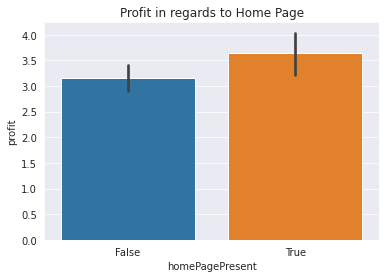

In [ ]:
sns.barplot(
    x = 'homePagePresent',
    y='profit',
    data = budget_revenue
)
plt.title('Profit in regards to Home Page')
plt.show()

### Q.8 Which languages rakes in high profit

In [ ]:
budget_revenue.columns

Index(['adult', 'budget', 'original_language', 'original_title', 'popularity',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'genre1',
       'genre2', 'genre3', 'genre4', 'homePagePresent', 'score', 'Producer1',
       'Producer2', 'TotalLanguages', 'profit', 'Genre'],
      dtype='object')

In [ ]:
budget_revenue.original_language.value_counts()

en    4785
hi      99
fr      88
ru      69
es      38
ja      38
it      30
zh      29
ta      26
ko      25
de      22
cn      15
ml      11
da      11
te       8
sv       8
pt       7
nl       7
pl       4
tr       4
ro       4
he       4
no       4
fi       3
id       3
sr       3
hu       2
th       2
xx       2
ur       2
bm       1
nb       1
ca       1
vi       1
af       1
el       1
kn       1
is       1
fa       1
mr       1
Name: original_language, dtype: int64

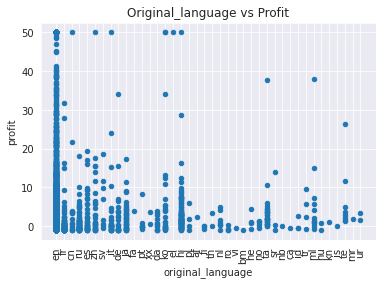

In [ ]:
budget_revenue.plot(x='original_language', y='profit', kind='scatter')
plt.title('Original_language vs Profit')
plt.xticks(rotation=90)
fig.show()

In [ ]:
fig = px.bar(
    budget_revenue,
    x='original_language',
    y='profit',
)
fig.update_yaxes(showgrid=False)
fig.update_traces(hovertemplate=None)
fig.update_layout(
    plot_bgcolor='#2d3035',
    paper_bgcolor='#2d3035',

)

fig.show()

### Q.9 Over a period of time, how have the profitability changed? Over the period of time, which genre of movies have gross well?

In [ ]:
budget_revenue.columns

Index(['adult', 'budget', 'original_language', 'original_title', 'popularity',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'genre1',
       'genre2', 'genre3', 'genre4', 'homePagePresent', 'score', 'Producer1',
       'Producer2', 'TotalLanguages', 'profit', 'Genre'],
      dtype='object')

### Q.10 If the movie speaks multiple languages, is the profit % higher?

In [ ]:
budget_revenue.TotalLanguages.unique()

array([1, 2, 3, 4, 5, 6, 0, 7, 8, 9])

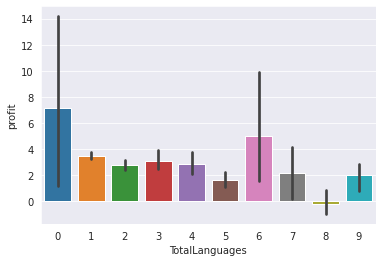

In [ ]:
sns.barplot(
    x='TotalLanguages',
    y='profit',
    data = budget_revenue
)

plt.show()

In [ ]:
fig = px.pie(
    budget_revenue,
    values = 'profit',
    names='TotalLanguages'
)

fig.show()